In [1]:
%%bash

cd pythonic-data-analysis/data/
ncdump model-gfs.nc

netcdf model-gfs {
dimensions:
	profile = 24 ;
	station = 1 ;
	isobaric3 = 1 ;
	station_name_strlen = 10 ;
	station_description_strlen = 33 ;
variables:
	float Convective_available_potential_energy_surface(station, profile) ;
		Convective_available_potential_energy_surface:standard_name = "Convective_available_potential_energy_surface" ;
		Convective_available_potential_energy_surface:long_name = "Convective_available_potential_energy_surface" ;
		Convective_available_potential_energy_surface:units = "J/kg" ;
		Convective_available_potential_energy_surface:coordinates = "time longitude latitude" ;
	float Convective_inhibition_surface(station, profile) ;
		Convective_inhibition_surface:standard_name = "Convective_inhibition_surface" ;
		Convective_inhibition_surface:long_name = "Convective_inhibition_surface" ;
		Convective_inhibition_surface:units = "J/kg" ;
		Convective_inhibition_surface:coordinates = "time longitude latitude" ;
	float Temperature_surface(station, profile) ;
		Temper

In [25]:
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'svg'

In [3]:
data = Dataset('pythonic-data-analysis/data/model-gfs.nc','r')

In [4]:
# get the time variable, and convert to datetimes
time_var = data.variables['time']
lat = 40 
lon = -105

In [5]:
import datetime
# print datetime.datetime(time)
print time.units
print time[:]

NameError: name 'time' is not defined

In [6]:
#make into datetime objects ---- and squeeze trick (get to one dimension)
time = num2date(time_var[:],time_var.units).squeeze()
print time.shape

(24,)


In [7]:
# fig, ax = plt.subplots(1,1, figsize=(12,6))
Ti = data.variables['Temperature_isobaric'][:].squeeze()
CAPE = data.variables['Convective_available_potential_energy_surface'][:].squeeze()
CIN = data.variables['Convective_inhibition_surface'][:].squeeze()

In [8]:
from datetime import datetime
print datetime.now()

2015-08-20 12:24:23.585011


In [9]:
def set_defaults(ax,label_font):
    #ax.set_title('Meteorology is BALLIN', fontdict=dict(size=30),weight='bold')
    ax.set_xlabel('Forecast Time', fontdict=label_font)
    
    from matplotlib.dates import DateFormatter,DayLocator,HourLocator
    ax.xaxis.set_major_locator(DayLocator())
    ax.xaxis.set_minor_locator(HourLocator(range(6,24,6)))

    ax.xaxis.set_major_formatter(DateFormatter('%h %d'))
    ax.xaxis.set_minor_formatter(DateFormatter('%Hz'))
    
    #format code doc is at http://strftime.org
    

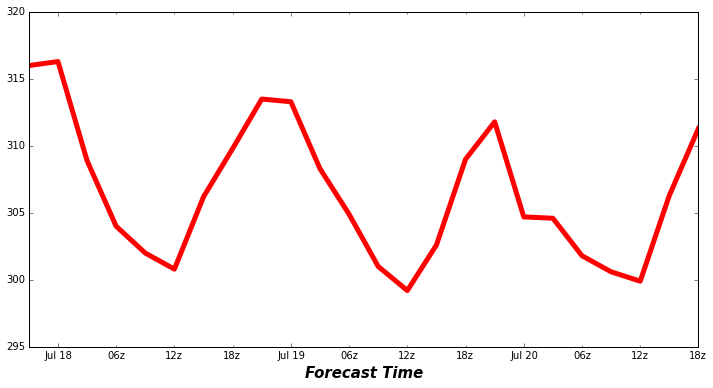

In [10]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(time,Ti,'r-', linewidth = '5')

label_font = dict(size=15, weight='bold', style = 'italic')

set_defaults(ax,label_font)

In [11]:
vals = [1,2,3,4]
names = ['one','two','three','four']
pairs = zip(names,vals)
print pairs

[('one', 1), ('two', 2), ('three', 3), ('four', 4)]


In [12]:
print zip(*pairs)

[('one', 'two', 'three', 'four'), (1, 2, 3, 4)]


In [13]:
a,b,c,d = 'eric'
print c

i


In [14]:
import math

In [15]:
def polar_to_cartesian(r,th):
    x = r*math.cos(th)
    y = r*math.sin(th)
    return x,y #tuple

#unpack tuple
x,y = polar_to_cartesian(2, math.pi/3)
print (x,y)

(1.0000000000000002, 1.7320508075688772)


In [16]:
for n,v in zip(names,vals):
    print('{0} == {1}'.format(n,v))

one == 1
two == 2
three == 3
four == 4


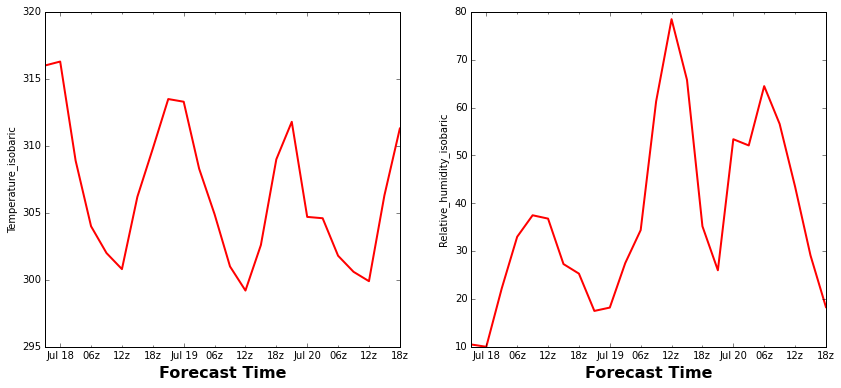

In [17]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
label_font = dict(size=16, weight='bold')

for ax,varname in zip(ax,['Temperature_isobaric','Relative_humidity_isobaric']):
    ax.plot(time, data.variables[varname][:].squeeze(),'r-',linewidth = 2)
    set_defaults(ax,label_font)
    ax.set_ylabel(varname)

In [18]:
num_map = dict(zip(vals,names))
print num_map

{1: 'one', 2: 'two', 3: 'three', 4: 'four'}


In [19]:
print num_map[1]

one


In [20]:
def K2F(K):
    return 1.8*(K-273.15)+32

print K2F(300)

80.33


In [21]:
variable_styles = {'Temperature_isobaric':{'line':dict(color='r',marker='s'),'label':'Temperature (K)','converter':K2F},
                    'Relative_humidity_isobaric':{'line':dict(color='b',marker='s'),'label':'RH (%)','converter':None}}

In [22]:
print variable_styles['Temperature_isobaric']['line']
print variable_styles['Relative_humidity_isobaric']['label']

{'marker': 's', 'color': 'r'}
RH (%)


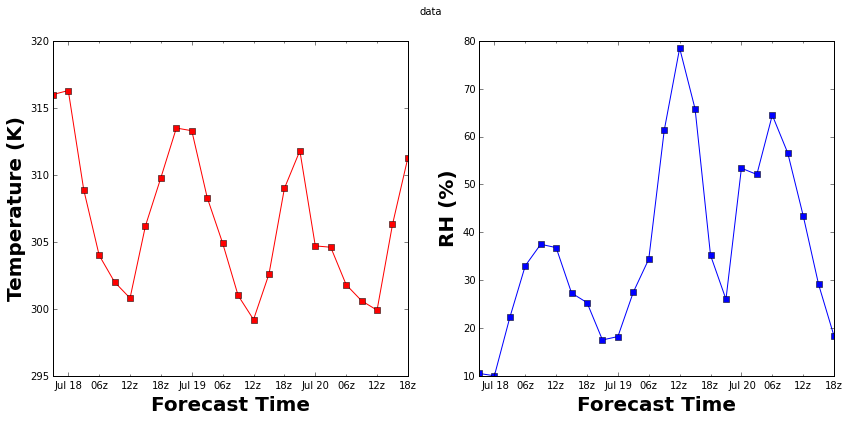

In [29]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
label_font = dict(size=20, weight='bold')

for ax,varname in zip(ax,['Temperature_isobaric','Relative_humidity_isobaric']):
    linespec = variable_styles[varname]['line']
    ax.plot(time, data.variables[varname][:].squeeze(),**linespec)
    set_defaults(ax,label_font)
    ax.set_ylabel(variable_styles[varname]['label'], fontdict=label_font)

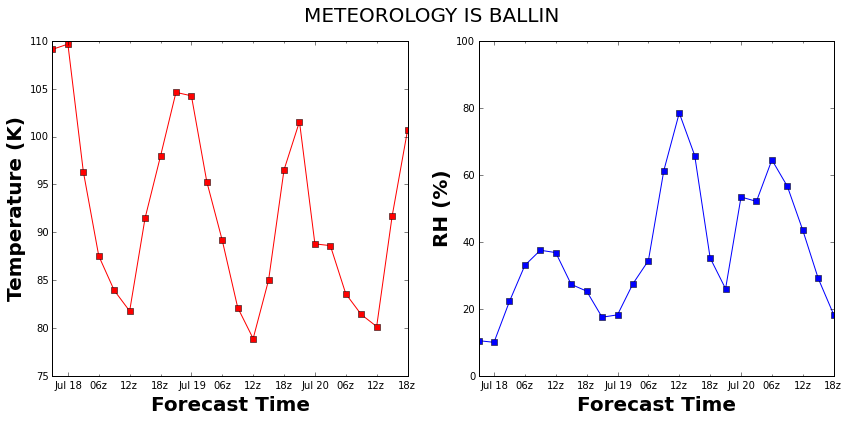

In [41]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
label_font = dict(size=20, weight='bold')
vars_to_plot = ['Temperature_isobaric','Relative_humidity_isobaric']

for ax,varname in zip(ax,vars_to_plot):
    linespec = variable_styles[varname]['line']
    linename = variable_styles[varname]['label']
    converter = variable_styles[varname]['converter']
    sdata = data.variables[varname][:].squeeze()
    
    #get the converter from the dict
    if converter is not None:
        # do something to the data if there is a converter
        sdata = converter(sdata)
        
    linespec = variable_styles[varname]['line']
    linename = variable_styles[varname]['label']
    ax.plot(time,sdata,**linespec)
    set_defaults(ax,label_font)
    ax.set_ylabel(linename, fontdict=label_font)
   
    #### custom axis ######
    if varname == 'Relative_humidity_isobaric':
        ax.set_ylim(0,100)
    
    #SUPER TITLE
    fig.suptitle('METEOROLOGY IS BALLIN',fontsize=20)